In [61]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import stft

# Audi A1 Driving at 40km/h

## Dataset 1

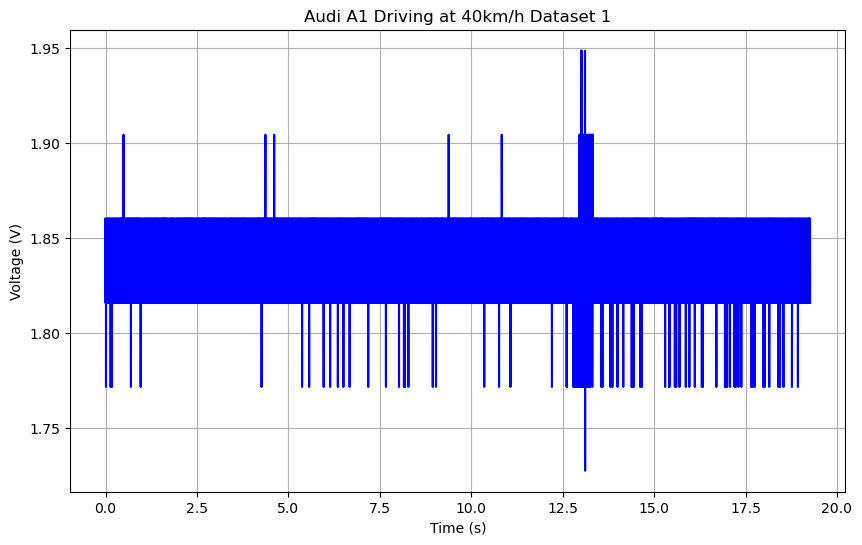

In [62]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('40ksps/40km_h.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array


# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Audi A1 Driving at 40km/h Dataset 1')
plt.grid(True)


# Show the plot
plt.show()


## Downsampling the data

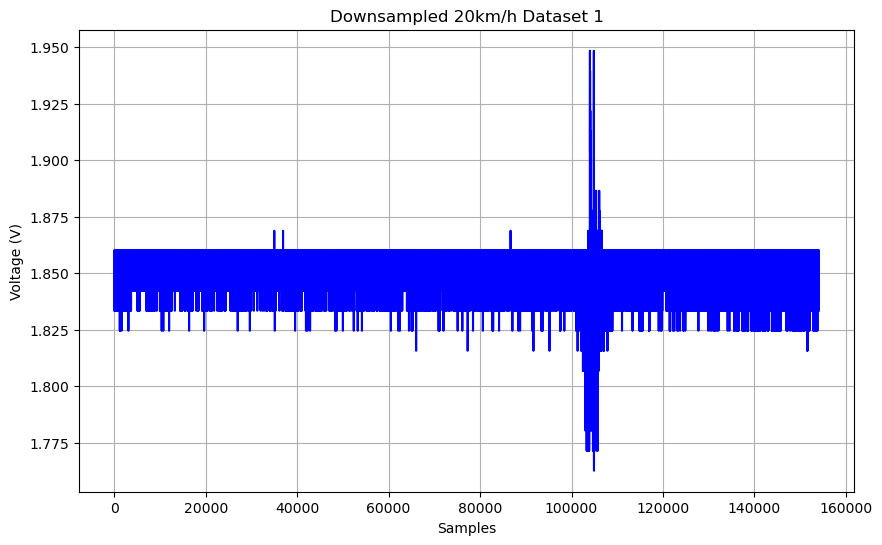

In [63]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 5

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled 20km/h Dataset 1')
plt.grid(True)

## Isolating Target

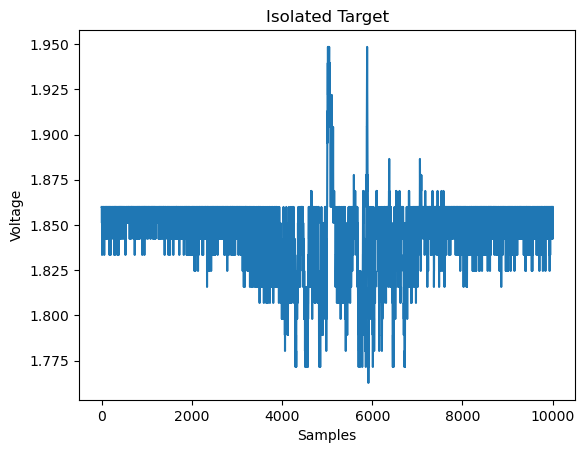

In [64]:
for i in range(len(downsampled_data)):
    if downsampled_data[i] > 1.875:
        target = downsampled_data[i-5000:5000+i]
        
        break
    


plt.plot(target)
plt.title('Isolated Target')
plt.xlabel('Samples')
plt.ylabel('Voltage')
plt.show()  

## Plotting DFT of Downsampled Data

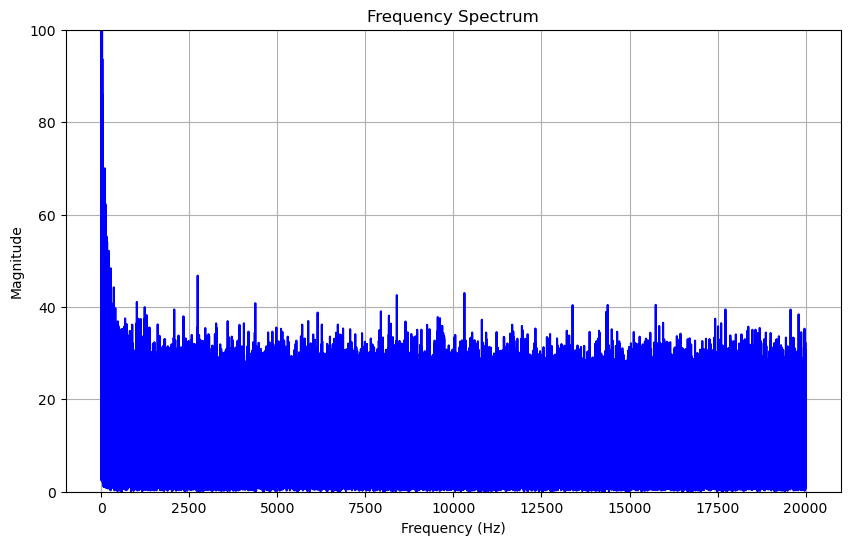

In [65]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 40000

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
# fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.ylim(0,100)
#plt.xlim(0,1000)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

## Creating a spectrogram of the above data

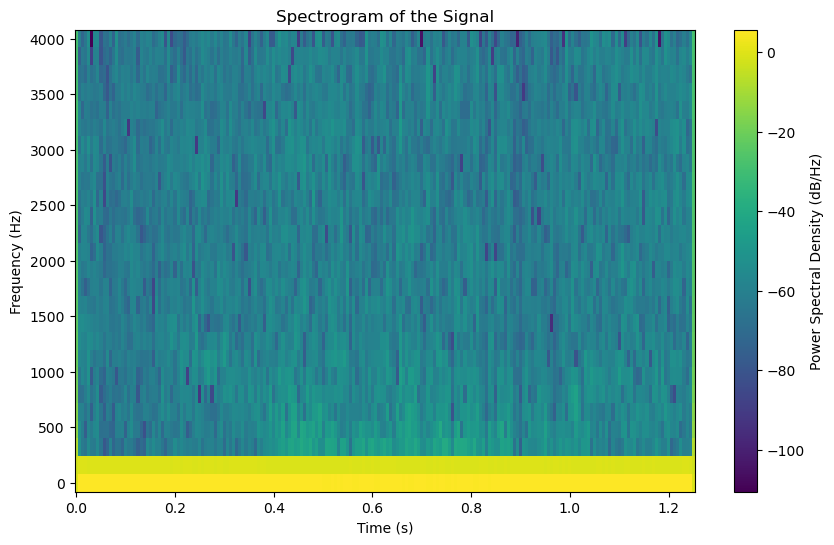

In [66]:
# Define your signal (you can replace this with your actual signal)
# For this example, we'll generate a simple sinusoidal signal.
sample_rate = 8000  # Sample rate in Hz
signal = target

# Define parameters for the STFT
segment_length = 50  # Number of samples per segment
overlap = 0  # Overlap between segments (adjust as needed)
nperseg = segment_length
noverlap = overlap

# Compute the spectrogram in 50-sample segments
frequencies, times, Sxx = stft(signal, fs=sample_rate, nperseg=nperseg, noverlap=noverlap)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Sxx)), shading='auto')
plt.colorbar(label='Power Spectral Density (dB/Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the Signal')
plt.show()
